In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [5]:
df = pd.read_csv("Thyroid_Diff.csv")

In [6]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [9]:
df.duplicated().sum()

19

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

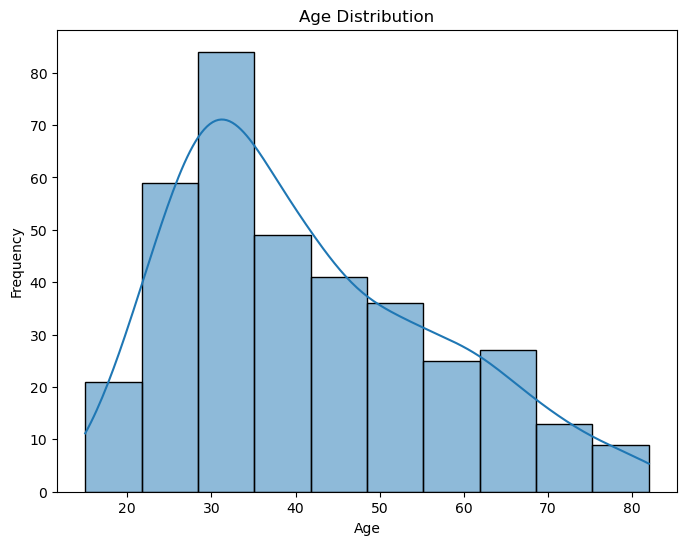

In [12]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

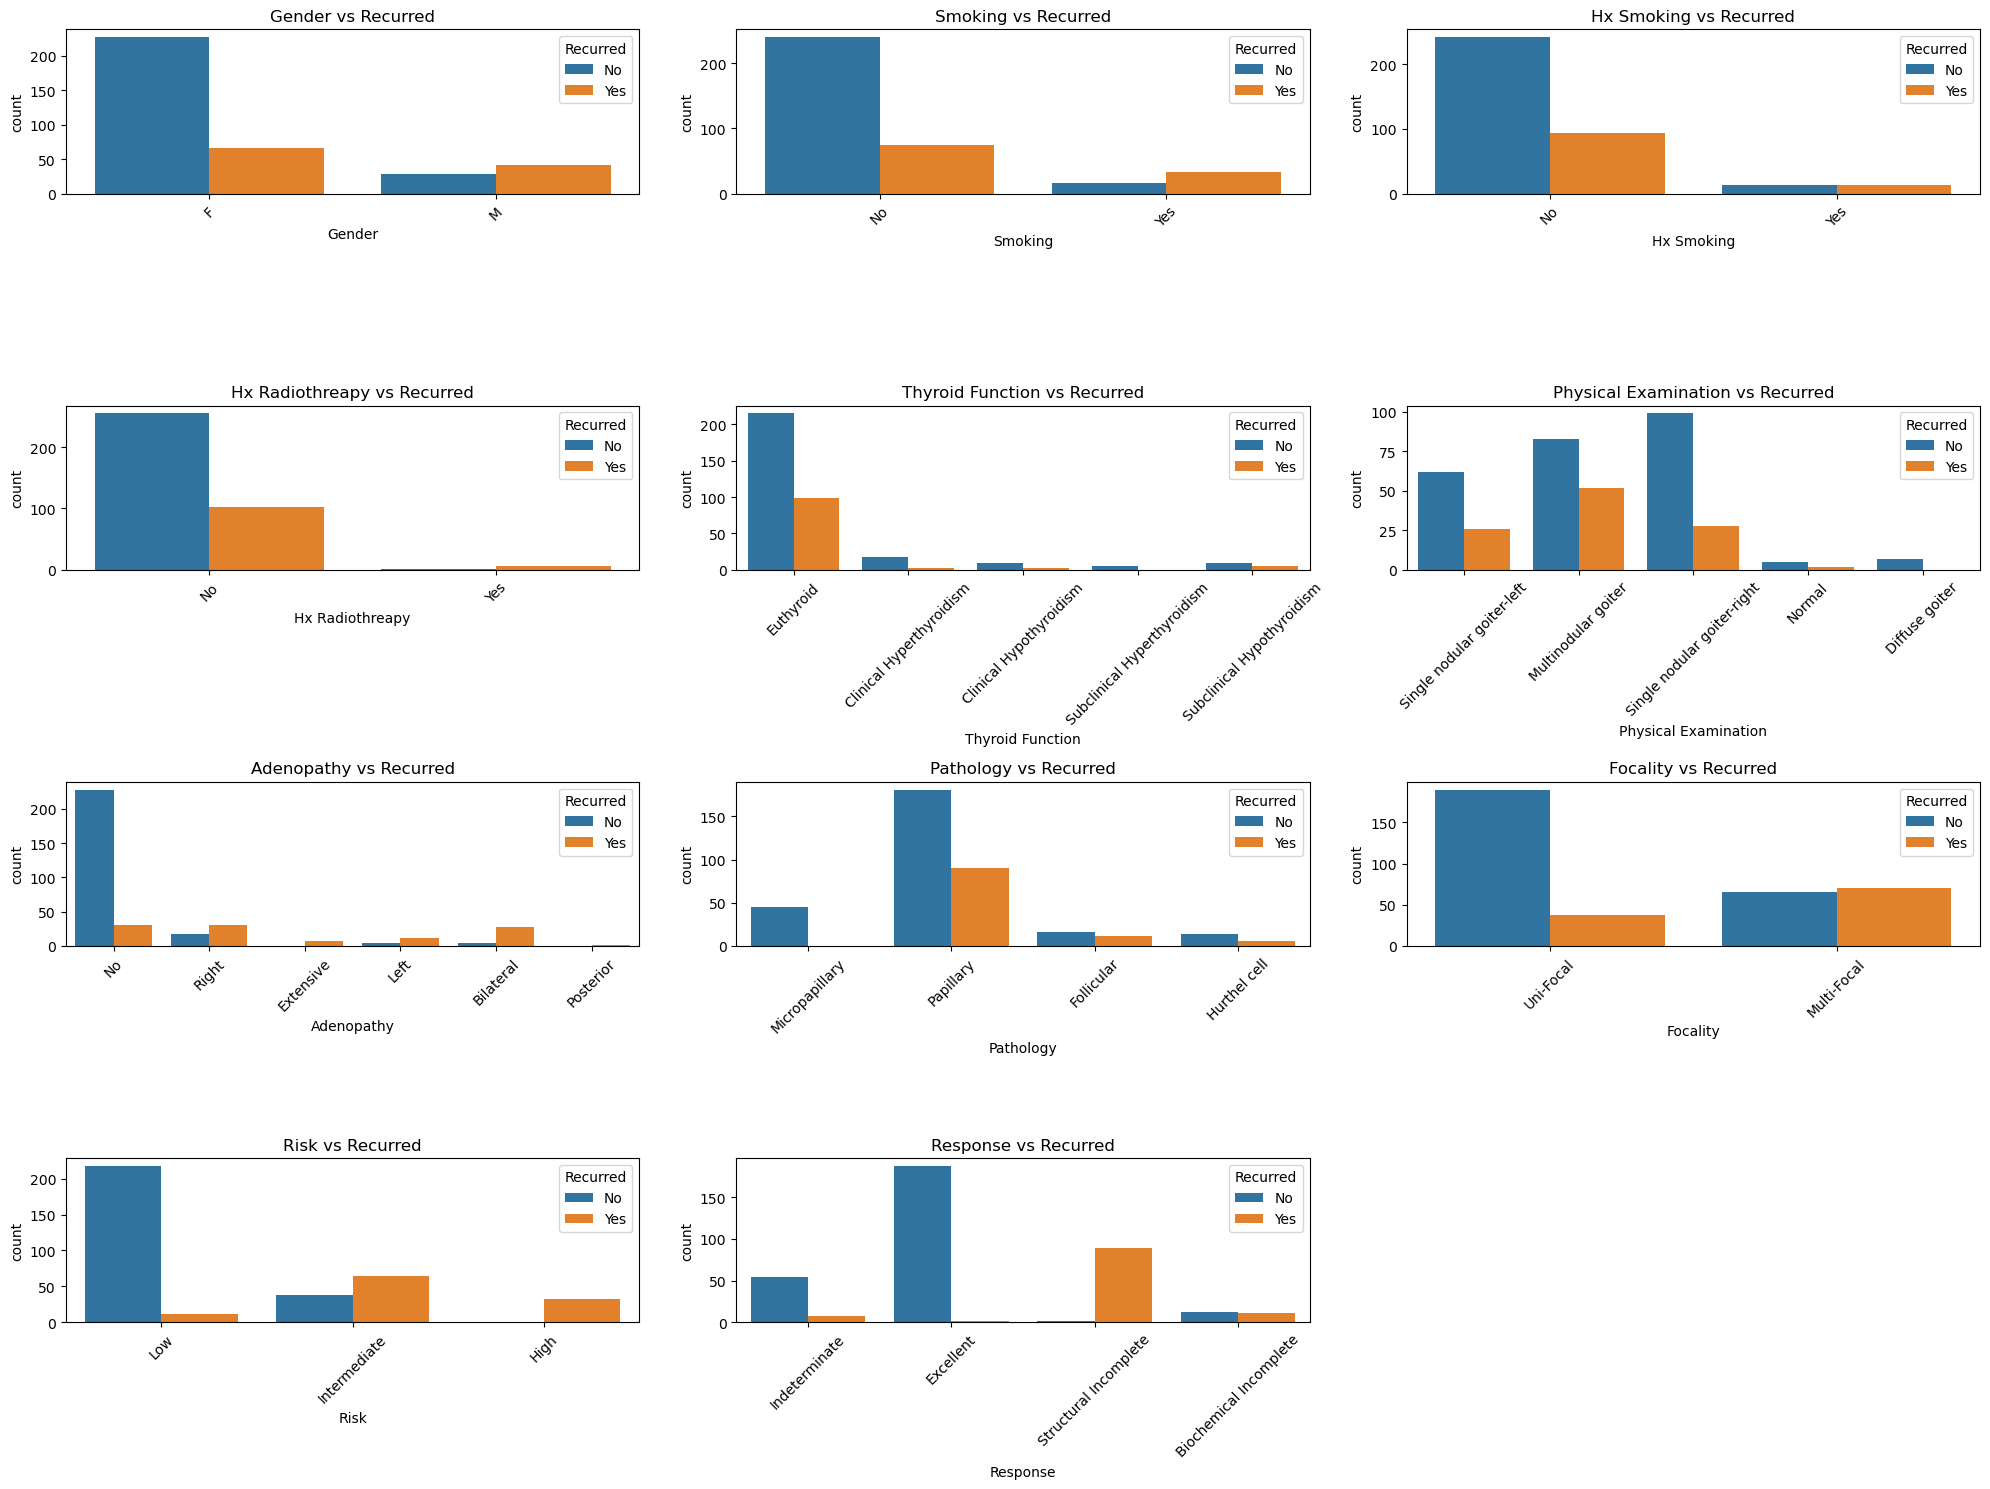

In [15]:
# Corrected Count Plots for Categorical Features Against the Target
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 
                        'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Response']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i) 
    sns.countplot(data=df, x=feature, hue='Recurred')
    plt.title(f'{feature} vs Recurred')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

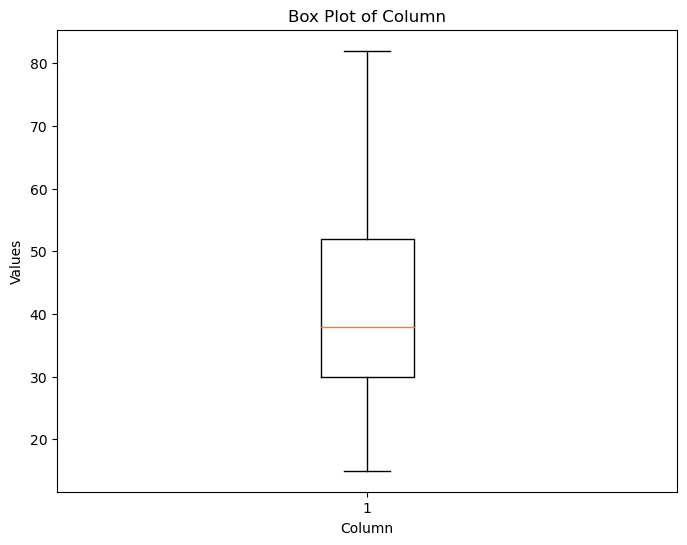

In [32]:
import matplotlib.pyplot as plt

# Assuming 'column_name' is the name of the column you want to plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.title('Box Plot of Column')
plt.xlabel('Column')
plt.ylabel('Values')
plt.show()


In [38]:
le = LabelEncoder()

In [39]:
x = df.columns

In [40]:
for i in x:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [41]:
X = df.drop('Recurred', axis = 1)

In [42]:
y = df['Recurred']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

In [44]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
67,51,0,0,0,0,2,3,3,3,1,2,1,0,0,0,1
350,37,0,0,0,0,4,3,3,3,0,1,4,1,1,1,3
295,56,0,0,0,0,2,4,3,3,0,1,3,1,0,1,1
335,29,1,0,0,0,2,1,1,3,0,1,3,2,0,0,3
84,33,0,0,0,0,2,3,3,3,1,1,1,2,0,0,2


In [45]:
X_test.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
327,58,0,0,0,0,2,1,3,3,0,1,3,1,0,1,2
277,41,1,1,0,0,2,4,3,1,0,1,3,0,0,0,1
48,26,0,0,0,0,2,2,1,3,1,1,0,2,0,0,3
26,43,1,0,0,0,3,3,3,2,1,2,0,0,0,0,1
238,29,0,1,0,0,2,3,3,0,1,2,2,0,0,0,3


In [46]:
y_train.head()

67     0
350    1
295    0
335    1
84     0
Name: Recurred, dtype: int32

In [47]:
y_test.head()

327    1
277    0
48     1
26     0
238    1
Name: Recurred, dtype: int32

In [48]:
def compare_classification_algorithms(X, y):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Trees": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machines (SVM)": SVC(),
        "k-Nearest Neighbors (kNN)": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    results = {}
    
    for name, clf in classifiers.items():
        scores = cross_val_score(clf, X, y, cv=5)
        accuracy = scores.mean()
        results[name] = accuracy
    
    best_algorithm = max(results, key=results.get)
    
    print("Accuracy Results:\n")
    for name, accuracy in results.items():
        print(name + ":", accuracy)
        
    print("\nBest Algorithm:",best_algorithm) 
        
compare_classification_algorithms(X_train, y_train)

Accuracy Results:

Logistic Regression: 0.9004675628287551
Decision Trees: 0.9209818819403857
Random Forest: 0.9518994739918176
Support Vector Machines (SVM): 0.7388661601402688
k-Nearest Neighbors (kNN): nan
Naive Bayes: 0.8866744593804793

Best Algorithm: Random Forest


In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
predictions = rfc.predict(X_test)

In [52]:
accuracy_score(y_test,predictions)

0.9863013698630136

In [53]:
confusion_matrix(y_test,predictions)

array([[52,  0],
       [ 1, 20]], dtype=int64)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.95      0.98        21

    accuracy                           0.99        73
   macro avg       0.99      0.98      0.98        73
weighted avg       0.99      0.99      0.99        73

